<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  1. Import the necessary libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import pandas_profiling 
%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  2. Read the data as a data frame

In [48]:
df  = pd.read_csv('insurance.csv') # Import the dataset named 'insurance.csv'
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df['children'] = df['children'].astype('category')
df.head()  # view the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  3. Perform basic EDA which should include the following and print out your insights at every step. 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">a. Shape of the data 

In [3]:
df.shape

(1338, 7)

<font color=darkblue size=4>Dataframe is having 1338 rows and 7 columns.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  b. Data type of each attribute

In [4]:
df.dtypes

age            int64
sex         category
bmi          float64
children    category
smoker      category
region      category
charges      float64
dtype: object

<font color=darkblue size=4>The attribute 'sex','smoker' ,'children' and 'region' were of type object and are converted to Category Object for memory redn.Rest all other attributes are of int and float type. 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  c. Checking the presence of missing values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<font color=darkblue size=4>No missing and null value present in the dataframe.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  d. 5 point summary of numerical attributes

In [6]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

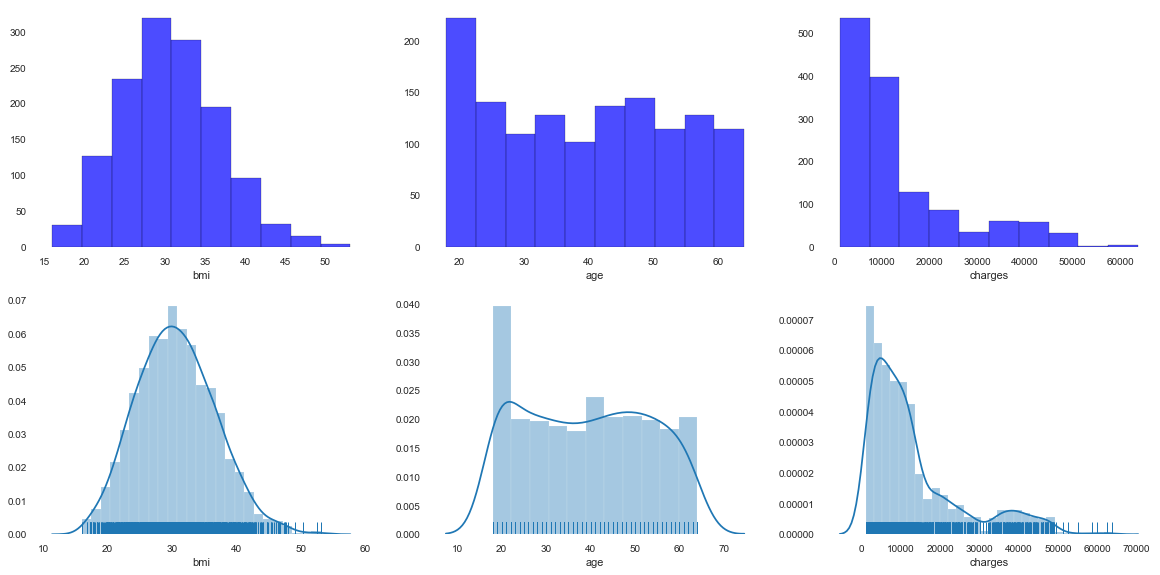

In [7]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.bmi, color='b', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(df.age, color='b', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(df.charges, color='b', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.subplot(3,3,4)
sns.distplot(df['bmi'], kde=True, rug=True);

plt.subplot(3,3,5)
sns.distplot(df['age'], kde=True, rug=True)

plt.subplot(3,3,6)

sns.distplot(df['charges'], kde=True, rug=True);

plt.show()

<font color=darkblue size=4>bmi column is normal distibuted.
age is kind of uniformly distributed and Most insurances are done in age 20.
charges is skewed to the right with more outliers.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [8]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

<font color=darkblue size=4>Skew of bmi and age are very less.Charges are highly skewed

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [9]:
q25, q75 = np.percentile(df['bmi'], 25), np.percentile(df['bmi'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['bmi'] if x < lower or x > upper]
print('outliers for bmi: %d' % len(outliers))

outliers for bmi: 9


In [10]:
q25, q75 = np.percentile(df['age'], 25), np.percentile(df['age'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['age'] if x < lower or x > upper]
print('outliers for age: %d' % len(outliers))

outliers for age: 0


In [11]:

q25, q75 = np.percentile(df['charges'], 25), np.percentile(df['charges'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df['charges'] if x < lower or x > upper]
print('outliers for charges: %d' % len(outliers))

outliers for charges: 139


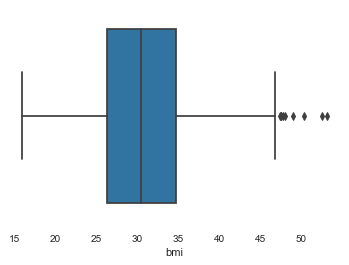

In [12]:
sns.boxplot(df["bmi"])

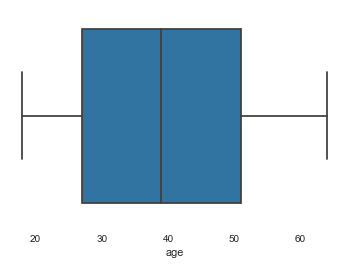

In [13]:
sns.boxplot(df["age"])

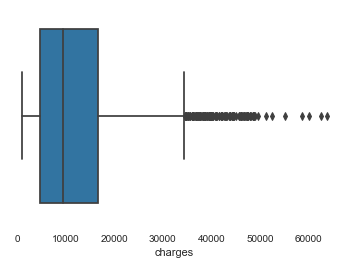

In [14]:
sns.boxplot(df["charges"])

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">  h. Distribution of categorical columns (include children)
    
<font color=darkblue> Univariate analysis refer to the analysis of a single variable. The main purpose of univariate analysis is to summarize and find patterns in the data. The key point is that there is only one variable involved in the analysis.


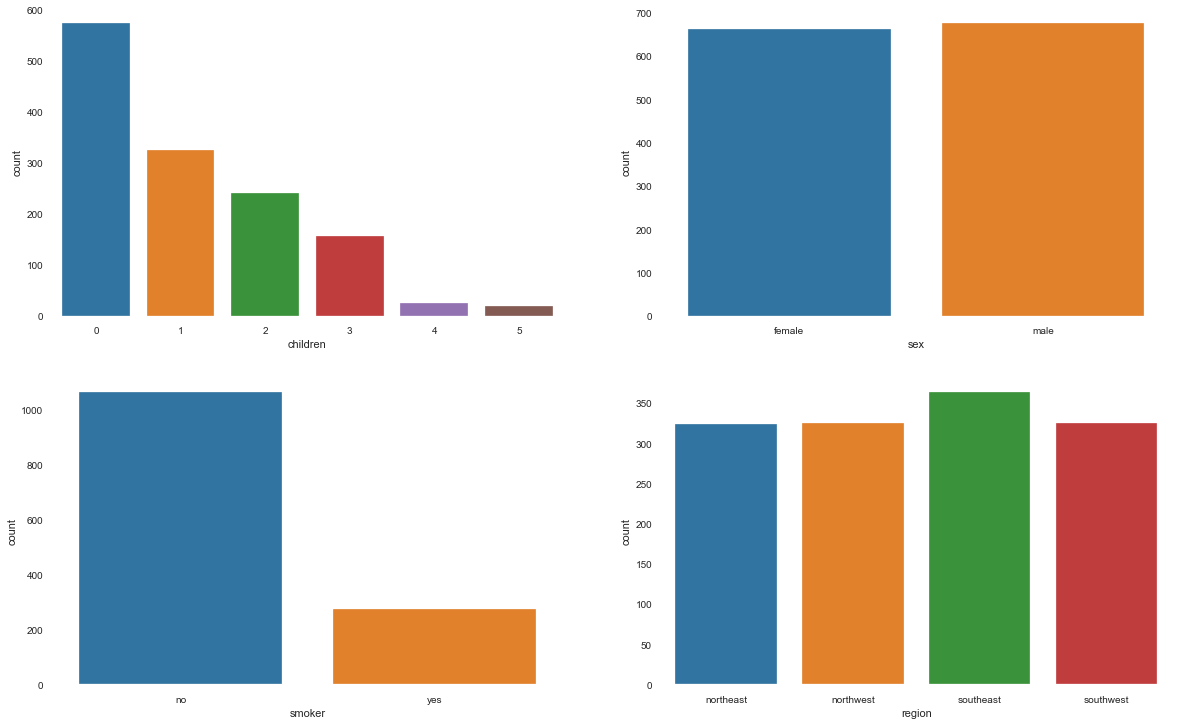

In [15]:
plt.figure(figsize=(20,26))
plt.subplot(4,2,1)
sns.countplot(df['children'])
plt.subplot(4,2,2)
sns.countplot(df['sex'])
plt.subplot(4,2,3)
sns.countplot(df['smoker'])
plt.subplot(4,2,4)
sns.countplot(df['region'])

<font color=darkblue size=4>There are lot of non smokers than smokers. Region and sex are distributed evenly. Most of the samples are people with no children.

<font color=darkblue size=4><font color=darkblue> <u>Bivariate Analysis</u>
    
Through bivariate analysis we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in bivariate analysis we try to determine if there is any relationship between two 
variables.

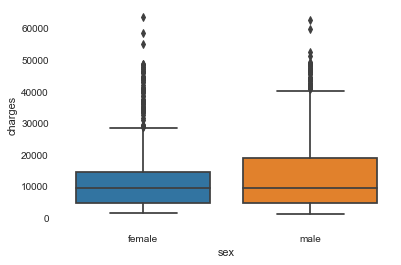

In [16]:
sns.boxplot(x='sex', y='charges', data= df)

<font color=darkblue size=4><font color=darkblue>Female has more outliers and Male have right skew. We also see both had high insurance charges.

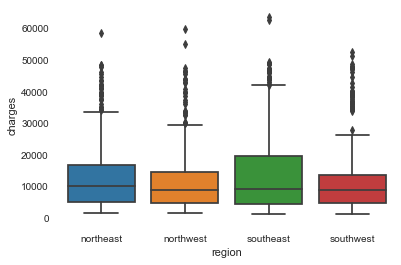

In [17]:
sns.boxplot(x='region', y='charges', data= df)

<font color=darkblue size=4>Southeast looks to have high insurance charges. All regions have some outliers.

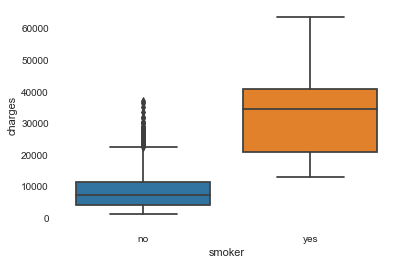

In [18]:
sns.boxplot(x='smoker', y='charges', data= df)

<font color=darkblue size=4>Smokers pay higher medical charges billed by health insurance than the non-smokers.

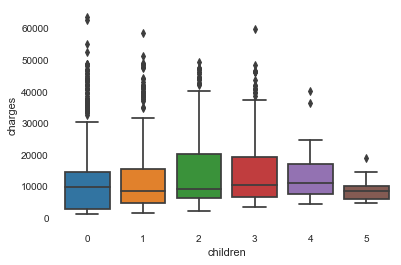

In [19]:
sns.boxplot(x='children', y='charges', data= df)

<font color=darkblue size=4>we see the higher charges are paid by people having no child while least paid is by people having 5 children.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">i. Pair plot that includes all the columns of the data frame

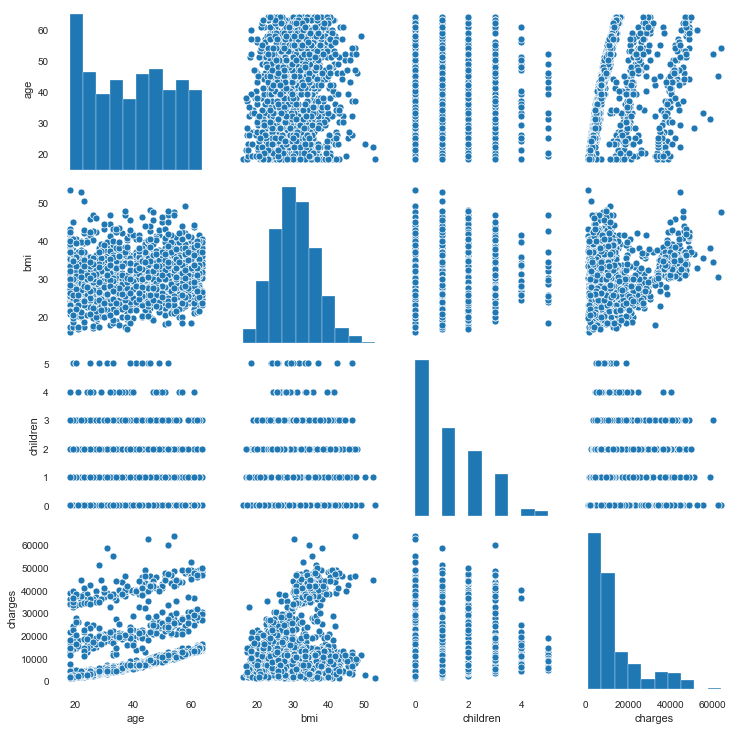

In [20]:
sns.pairplot(df)  #pairplot
plt.show()

<font color=darkblue>
charges vs age - it is apparent the that charges are higher for older individuals.
charges vs bmi - BMIs greater than 30 is considered obesed. The chart shows a group of individuals with BMI > 30 are charged higher.
charges vs no. children - those who has more children tends to have been charged lower than those who don't have.

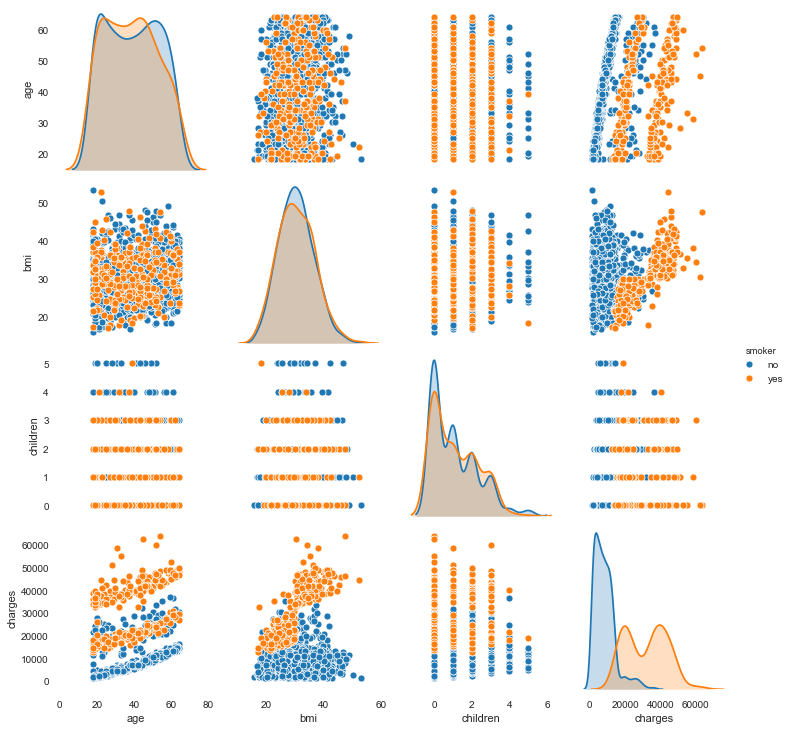

In [21]:
# sns.set(style = "ticks")
sns.pairplot(df, hue = "smoker")

<font color=darkblue>
Focusing again on the charts in the bottom row, we can say that the higher amount of charges are dominated by orange points which are represented by smokers.

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">Answer the following questions with statistical evidence 
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">a. Do charges of people who smoke differ significantly from the people who don't?

### Step 1: Define null and alternative hypotheses

In [22]:
#Applying T-test to determine the impact of smoking on the charges.
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

### Step 2: Decide the significance level
    
<font color=darkblue>    
Here we select 𝛼 = 0.05

### Step 3: Identify the test statistic

<font color=darkblue>
T-test

### Step 4: Calculate the p - value and test statistic

In [23]:
x = np.array(df[df['smoker'] == 'yes']['charges'])#selecting charges values corresponding to smoker as an array
y = np.array(df[df['smoker'] == 'no']['charges'])#selecting charges values corresponding to not smoker as an array
t,p_value = stats.ttest_ind(x,y)#performing an independent T-test
p_value

8.271435842177219e-283

### Step 5:  Decide to reject or accept null hypothesis

In [24]:
if p_value <0.05:
    print("charges has effect on smoking(reject H0)")
else:
    print("charges has no effect on smoking(accept H0)")

charges has effect on smoking(reject H0)


<font color=darkblue size=4>charges of people who smoke differ significantly from the people who don't

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">b. Does bmi of males differ significantly from that of females?

### Step 1: Define null and alternative hypotheses

In [25]:
Ho = "Gender has no effect on bmi"   
Ha = "Gender has an impact on bmi"  

### Step 2: Decide the significance level

we select  𝛼  = 0.05

### Step 3: Identify the test statistic

T Test

### Step 4: Calculate the p - value and test statistic

In [26]:
x = np.array(df[df['sex'] == 'male']['bmi'])#selecting bmi values corresponding to male as an array
y = np.array(df[df['sex'] == 'female']['bmi'])#selecting bmi values corresponding to female as an array
t,p_value = stats.ttest_ind(x,y)#performing an independent T-test
p_value

0.08997637178984932

### Step 5:  Decide to reject or accept null hypothesis

In [27]:
if p_value <0.05:
    print("Gender has an effect on bmi(reject H0)")
else:
    print("Gender has no effect on bmi(accept H0)")

Gender has no effect on bmi(accept H0)


<font color=darkblue size=4>bmi of males do not differ significantly from that of females

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">c. Is the proportion of smokers significantly different in different genders?

### Step 1: Define null and alternative hypotheses

Ho = "Gender has no effect on smoking habits" 

Ha = "Gender has an effect on smoking habits" 

### Step 2: Decide the significance level

we select  𝛼  = 0.05

### Step 3: Identify the test statistic

Chi Square Test


### Step 4: Calculate the p - value and test statistic

In [28]:
crosstab = pd.crosstab(df['sex'],df['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)
print(crosstab)

0.006548143503580696
smoker   no  yes
sex             
female  547  115
male    517  159


### Step 5:  Decide to reject or accept null hypothesis

In [29]:
if p_value <0.05:
    print("Gender has an effect on smoking habits(reject H0)")
else:
    print("Gender has an effect on smoking habits(accept H0)")

Gender has an effect on smoking habits(reject H0)


<font color=darkblue size=4>Proportion of smokers in males is significantly different from that of the females

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;">d. Is the distribution of bmi across women with no children, one child and two children, the same?

### Step 1: Define null and alternative hypotheses

Ho = "Number of children has no effect on bmi"   
Ha = "Number of children has an effect on bmi"   

### Step 2: Decide the significance level

we select  𝛼  = 0.05

### Step 3: Identify the test statistic

The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable.

### Step 4: Calculate p value

In [30]:
female_df = df[df['sex'] == 'female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
p_value

0.7158579926754841

### Step 5:  Decide to reject or accept null hypothesis

In [31]:
if p_value < 0.05:  # Setting our significance level at 5%
    print("Number of children has an effect on bmi(reject H0)")
else:
    print("Number of children has no effect on bmi(accept H0)")

Number of children has no effect on bmi(accept H0)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:green;"><u>Pandas Profiling with Healthcare Data</u>

Generates profile reports from a pandas DataFrame. 
pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

Link - https://pypi.org/project/pandas-profiling/

In [46]:
#Getting the pandas profiling report 
pandas_profiling.ProfileReport(df)

In [47]:
#Getting an htl file as output here 
pandas_profiling.ProfileReport(df).to_file('Healthcare.html')